# 1. Primerjava cen električne energije

**Pri tem vprašanju nas zanima primerjava cen električne energije med gospodinjskimi in negospodinjskimi odjemalci ter med različnimi standardnimi porabniškimi skupinami.**

#### 1.1 Pregled podatkov v potrebnih podatkovnih setih

Najprej smo pregledali podatke v podatkovnih setih, ki smo jih uporabljali. To smo naredili z izpisom opisa podatkovnega okvirja in nekaj osnovnimi grafi.

In [42]:
from reading import data_extraction as de
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import misc_utils as mu

household_prices = de.read('../data/Cene el. energije za gospodinjske odjemalce.csv')
nonhousehold_prices = de.read('../data/Cene el. energije za negospodinjske odjemalce.csv')
hp = dict()
nhp = dict()

mu.display_side_by_side(household_prices.describe(), nonhousehold_prices.describe(), titles=['Gospodinjski odjemalci', 'Negospodinjski odjemalci'])

# Prepare dicts of household prices and non household prices. These dicts 
# are used to plot how the prices change over time.
# Key: user group, value: dict of key(quarter) and value(price)        
hp = mu.init_dict_based_on_column(household_prices, 'STANDARDNA PORABNIŠKA SKUPINA (LETNA PORABA)')
nhp = mu.init_dict_based_on_column(nonhousehold_prices, 'STANDARDNA PORABNIŠKA SKUPINA (LETNA PORABA)')
        
# Fill dicts with prices for each user group and quarter, thus symulating a matrix.
# Prices include all taxes.
for column in household_prices.columns[2:]:
    for key, value in hp.items():
        hp[key][column] = household_prices[column][household_prices['STANDARDNA PORABNIŠKA SKUPINA (LETNA PORABA)'] == key][household_prices['CENA'] == 'Z vsemi davki'].tolist()[0]
        
for column in nonhousehold_prices.columns[2:]:
    for key, value in nhp.items():
        nhp[key][column] = nonhousehold_prices[column][nonhousehold_prices['STANDARDNA PORABNIŠKA SKUPINA (LETNA PORABA)'] == key][nonhousehold_prices['CENA'] == 'Z vsemi davki'].tolist()[0]        

# Flatten the internal dicts for use in plotting.
hits = mu.flatten_internal_dict(hp)
nhits = mu.flatten_internal_dict(nhp)

# Get quarter names.
quarters = [x for x in [y for y in hp.values()][0].keys()]



,2012Q1,2012Q2,2012Q3,2012Q4,2013Q1,2013Q2,2013Q3,2013Q4,2014Q1,2014Q2,2014Q3,2014Q4,2015Q1,2015Q2,2015Q3,2015Q4,2016Q1,2016Q2,2016Q3,2016Q4,2017Q1,2017Q2,2017Q3,2017Q4,2018Q1,2018Q2,2018Q3,2018Q4,2019Q1,2019Q2,2019Q3,2019Q4,2020Q1,2020Q2,2020Q3,2020Q4,2021Q1,2021Q2,2021Q3,2021Q4
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.00000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,0.095812,0.098276,0.099336,0.096806,0.098494,0.102603,0.104812,0.101230,0.101430,0.101906,0.101118,0.095500,0.095173,0.096188,0.09917,0.095767,0.092858,0.095252,0.096670,0.092452,0.098836,0.103024,0.104197,0.096533,0.106712,0.109139,0.110624,0.103161,0.107197,0.109030,0.110852,0.103391,0.096779,0.085239,0.115494,0.103721,0.108367,0.113173,0.116652,0.104361
std,0.055142,0.056928,0.058002,0.055973,0.056383,0.059223,0.061186,0.058635,0.059471,0.059431,0.057843,0.053028,0.053847,0.054130,0.05631,0.053713,0.051471,0.052737,0.053545,0.051145,0.058913,0.062254,0.062802,0.055995,0.072688,0.071973,0.072089,0.063328,0.072242,0.071328,0.071203,0.062888,0.060164,0.049546,0.074416,0.062292,0.072887,0.074975,0.075431,0.062714
min,0.005200,0.005300,0.005400,0.005300,0.006700,0.007700,0.008100,0.007600,0.007600,0.008100,0.008500,0.008100,0.007200,0.008100,0.00890,0.008400,0.007900,0.009100,0.009600,0.008200,0.007800,0.009200,0.009200,0.008300,0.007600,0.009600,0.010000,0.008300,0.007800,0.009300,0.010000,0.008500,0.006500,0.005800,0.010200,0.008100,0.007500,0.009300,0.010700,0.008000
25%,0.057400,0.058900,0.060000,0.057300,0.056300,0.058500,0.059700,0.056800,0.056000,0.057100,0.057300,0.055900,0.056100,0.055800,0.05640,0.055600,0.054600,0.055000,0.055400,0.054000,0.053900,0.054500,0.055000,0.052400,0.054400,0.054400,0.055300,0.055500,0.056100,0.056700,0.057600,0.058500,0.055200,0.044800,0.063800,0.061900,0.061500,0.063300,0.064900,0.062400
50%,0.105200,0.107100,0.108600,0.105500,0.105000,0.108600,0.109500,0.106700,0.105600,0.106400,0.107200,0.105600,0.102400,0.103300,0.10450,0.102200,0.100900,0.103000,0.104200,0.100700,0.100500,0.103700,0.105000,0.099400,0.099700,0.104600,0.106600,0.104100,0.100800,0.103700,0.106300,0.102900,0.097000,0.087200,0.111400,0.105400,0.102200,0.106400,0.111200,0.104300
75%,0.130800,0.134500,0.135400,0.133400,0.132200,0.136300,0.137500,0.134300,0.133200,0.134000,0.135100,0.131700,0.127200,0.129900,0.13420,0.130200,0.128400,0.133200,0.135900,0.128600,0.130200,0.134000,0.135400,0.129400,0.130800,0.134600,0.136400,0.132400,0.132000,0.136200,0.139100,0.134100,0.122400,0.114700,0.143500,0.135100,0.133100,0.139900,0.145800,0.135800
max,0.216600,0.225800,0.233400,0.221100,0.230200,0.249100,0.261900,0.245400,0.253000,0.253000,0.238600,0.198000,0.220100,0.218500,0.23230,0.215100,0.195800,0.201200,0.205100,0.194100,0.258300,0.276500,0.276100,0.236900,0.342800,0.336400,0.335200,0.285400,0.339700,0.332100,0.329700,0.280900,0.274100,0.203600,0.345700,0.274900,0.343100,0.351200,0.350400,0.277000
,2012Q1,2012Q2,2012Q3,2012Q4,2013Q1,2013Q2,2013Q3,2013Q4,2014Q1,2014Q2,2014Q3,2014Q4,2015Q1,2015Q2,2015Q3,2015Q4,2016Q1,2016Q2,2016Q3,2016Q4,2017Q1,2017Q2,2017Q3,2017Q4,2018Q1,2018Q2,2018Q3,2018Q4,2019Q1,2019Q2,2019Q3,2019Q4,2020Q1,2020Q2,2020Q3,2020Q4,2021Q1,2021Q2,2021Q3,2021Q4
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.00000,39.000000,39.00000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000


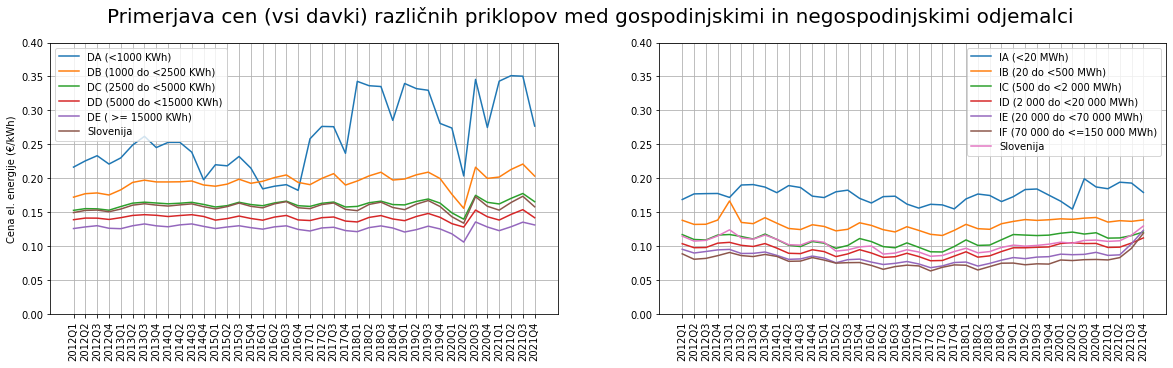

In [43]:
# Plot data.
plt.figure(figsize=(20, 5))
plt.suptitle("Primerjava cen (vsi davki) različnih priklopov med gospodinjskimi in negospodinjskimi odjemalci", fontsize=20)
plt.subplot(1, 2, 1)
plt.xticks(rotation=90)
plt.ylabel("Cena el. energije (€/kWh)")
plt.grid()
plt.ylim(0, 0.4)
for key, value in hits.items():
    plt.plot(quarters, value, label=key)
plt.legend()

plt.subplot(1, 2, 2)
plt.xticks(rotation=90)
plt.grid()
plt.ylim(0, 0.4)
for key, value in nhits.items():
    plt.plot(quarters, value, label=key)
plt.legend()
plt.show()

Iz podatkov lahko vidimo, da imajo odjemalci z manjšimi priklopi višje cene el. energije kot odjemalci z višjimi priklopi. Prav tako vidimo, da imajo negospodinjski odjemalci več standardnih porabniških skupin (in seveda tudi večje priklopne moči) kot gospodinjski odjemalci. Vidimo lahko tudi, da imajo negospodinjski odjemalci višjo minimalno ceno, a nižjo maksimalno ceno el. energije, hkrati pa opazimo tudi, da je razpon med cenami negospodinjskih odjemalcev veliko manjši.

#### 1.2 Analiza gospodinjskih odjemalcev

Pri tem podvprašanju smo analizirali cene gospodinjskih odjemalcev in odgovorili na vprašanja, ki so se ob tem pojavila.

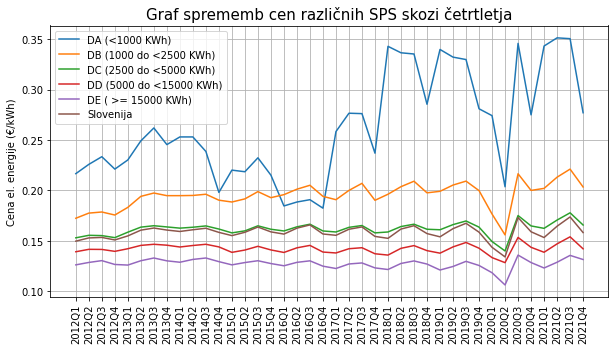

In [44]:
household_prices = de.read('../data/Cene el. energije za gospodinjske odjemalce.csv')
hp = dict()

hp = mu.init_dict_based_on_column(household_prices, 'STANDARDNA PORABNIŠKA SKUPINA (LETNA PORABA)')

# Fill dicts with prices for each user group and quarter, thus symulating a matrix.
# Prices include all taxes.
for column in household_prices.columns[2:]:
    for key, value in hp.items():
        hp[key][column] = household_prices[column][household_prices['STANDARDNA PORABNIŠKA SKUPINA (LETNA PORABA)'] == key][household_prices['CENA'] == 'Z vsemi davki'].tolist()[0]
        
# Flatten the internal dicts for use in plotting.
hits = dict()
for key, value in hp.items():
    hits[key] = list(value.values())
    
quarters = [x for x in [y for y in hp.values()][0].keys()]

# Plot data.
plt.figure(figsize=(10, 5))
plt.title("Graf sprememb cen različnih SPS skozi četrtletja", fontsize=15)
plt.xticks(rotation=90)
plt.ylabel("Cena el. energije (€/kWh)")
plt.grid()
for key, value in hits.items():
    plt.plot(quarters, value, label=key)
plt.legend()
print()

Ker smo opazili zelo velik porast cen pri gospodinjskih odjemalcih (Standardna porabniška skupina DA), v letih 2017 in 2018, nas je zato zanimal bolj natančen pregled vseh faktorjev, ki so vplivali na končno ceno. Prav tako lahko smo opazili velik padec v cenah vseh porabniških skupin v drugem četrtletju leta 2020.

Ko smo iskali vzroke za padec cen v drugem četrtletju leta 2020, smo ugotovili, da se je [aprila tistega leta poraba el. energije zmanjšala za 19% v primerjavi z marcem](https://www.stat.si/statweb/News/Index/8852) in 15% v primerjavi z aprilom 2019. Manjši proizvodnji el. energije pa je sledila tudi manjša proraba goriv. Skupna poraba goriv aprila 2020 je bila za 19% manjša kot aprila 2019. Zmanjšala se je tudi oskrba z motornim(za 43%) in dizelskim gorivom(za 65%), kar je bilo večinoma posledica COVID-19.

##### 1.2.1 Analiza porasta cen standarnde porabniške skupine DA leta 2017/2018

In [45]:
quarters_to_analyze = ['2016Q4', '2017Q1', '2017Q2', '2017Q3', '2017Q4', '2018Q1', '2018Q2', '2018Q3', '2018Q4']

# Base group = DE ( >= 15000 kWh)

hp_specific = dict()

# Get only needed quarters.
for key, value in hp.items():
    hp_specific[key] = {k: v for k, v in value.items() if k in quarters_to_analyze}
    
# Calculate actual differrences and percentage differences between groups.
differences = dict()
for q in quarters_to_analyze:
    differences[q] = {'Actual diff' : hp_specific['DA (<1000 KWh)'][q] - hp_specific['DE ( >= 15000 KWh)'][q], 
                      'Percent diff' : mu.get_percentage_diff(hp_specific['DA (<1000 KWh)'][q], hp_specific['DE ( >= 15000 KWh)'][q])}

# Display results.    
print('         Actual difference | Percent difference')
for quarter, difference in differences.items():
    print(quarter + ":", difference['Actual diff'], difference['Percent diff'])
    
pmean = np.mean([v['Percent diff'] for k, v in differences.items() if k != '2016Q4'])
print()
print('Mean percent diff of years 2017 and 2018 compared to 2016Q4:', pmean - differences['2016Q4']['Percent diff'])
print('Mean percent diff of years 2017 and 2018:', pmean)

         Actual difference | Percent difference
2016Q4: 0.05750000000000001 46.03682946357087
2017Q1: 0.1357 110.68515497553018
2017Q2: 0.14940000000000003 117.54523996852875
2017Q3: 0.14800000000000002 115.53473848555818
2017Q4: 0.1137 92.28896103896103
2018Q1: 0.2212 181.9078947368421
2018Q2: 0.20879999999999999 163.63636363636365
2018Q3: 0.2051 157.64796310530363
2018Q4: 0.15839999999999999 124.72440944881889

Mean percent diff of years 2017 and 2018 compared to 2016Q4: 86.95951121091743
Mean percent diff of years 2017 and 2018: 132.9963406744883


Opazimo lahko, da je cena el. energije standardne porabniške skupine DA v primerjavi z standardno porabniško skupino DE iz leta 2016 na leti 2017/2018 narasla za približno 87%. Že v zadnjem četrtletju 2016 sta se ceni razlikovali za 46% (0.0575€), nato pa je njuna razlika narasla na povprečno 133%.

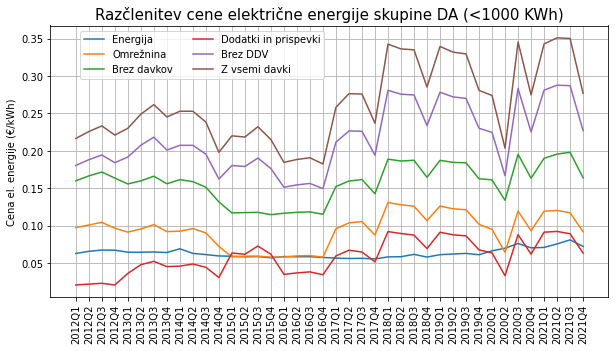

In [46]:
hp = dict()

hp = mu.init_dict_based_on_column(household_prices, 'CENA')

# Fill dicts with prices for each user group and quarter, thus symulating a matrix.
# Prices include all taxes.
for column in household_prices.columns[2:]:
    for key, value in hp.items():
        hp[key][column] = household_prices[column][household_prices['CENA'] == key][household_prices['STANDARDNA PORABNIŠKA SKUPINA (LETNA PORABA)'] == 'DA (<1000 KWh)'].tolist()[0]

# Flatten the internal dicts for use in plotting.        
hits = mu.flatten_internal_dict(hp)
    
plt.figure(figsize=(10, 5))
plt.title('Razčlenitev cene električne energije skupine DA (<1000 KWh)', fontsize=15)
plt.xticks(rotation=90)
plt.ylabel("Cena el. energije (€/kWh)")
plt.grid()
for key, value in hits.items():
    plt.plot(quarters, value, label=key)
plt.legend(loc='upper right', bbox_to_anchor=(0.5, 1.00), ncol=2)
print()

Preverili smo možne dejavnike, ki bi lahko vplivali na višje cene, in ugotovili, da je se je v letu 2018 zgodil porast cen energetskih surovin, zgodil se je [upad domače proizvodnje, kar je dvignilo ceno zemeljskega plina](https://www.gzs.si/Portals/SN-informacije-Pomoc/Vsebine/GG/december-2018/65.pdf), prav tako pa se je v Angliji zaprlo največje skladišče zemeljskega plina. Bolj podrobno analizo energentov bomo izvedli v naslednjih vprašanjih.

##### 1.2.2 Ugotovitve

Pri tem podvprašanju smo ugotovili, da imajo standardne porabniške skupine z manjšo močjo priklopa višje cene električne energije kot skupine z višjo močjo priklopa. Prav tako smo v podatkih opazili dve zanimivosti, in sicer porast cen z leta 2016 na leto 2017 oz. 2018 za SPS DA(<1000 KWh) ter velik padec cen za vse SPS v drugem četrtletju 2020.

Za porast cen skupine DA smo ugotovili, da je prišlo do tega najvrjetneje zaradi več razlogov, ki pa so naraščanje cen energetskih surovin, upad domače proizvodnje kar je posledično dvignilo ceno zemeljskega plina, prav tako pa se je leta 2018 zaprlo največje skladišče zemeljskega plina v Angliji.

Ugotovili smo tudi, da je do padanja cen za vse porabniške skupine leta 2020 prišlo zaradi vpadanja porabe električne energije, kar je pomenilo tudi manjšp proizvodnjo. Manjši proizvodnji je tako sledila tudi manjša poraba goriv, potrebnih za proizvod električne energije. Prav tako se je močno zmanjšala tudi oskrba z motornim in dizelskim gorivom. Do teh sprememb je verjetno prišlo zaradi prvega vala COVID-19 ter prvega zaprtja države.

#### 1.3 Analiza negospodinjskih odjemalcev

Pri tem podvprašanju smo analizirali cene negospodinjskih odjemalcev in odgovorili na vprašanja, ki so se ob tem pojavila.

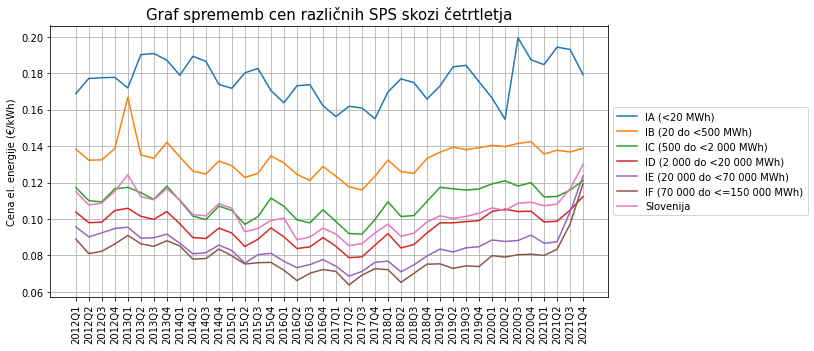

In [47]:
nonhousehold_prices = de.read('../data/Cene el. energije za negospodinjske odjemalce.csv')
nhp = dict()

nhp = mu.init_dict_based_on_column(nonhousehold_prices, 'STANDARDNA PORABNIŠKA SKUPINA (LETNA PORABA)')

# Fill dicts with prices for each user group and quarter, thus symulating a matrix.
# Prices include all taxes.
for column in nonhousehold_prices.columns[2:]:
    for key, value in nhp.items():
        nhp[key][column] = nonhousehold_prices[column][nonhousehold_prices['STANDARDNA PORABNIŠKA SKUPINA (LETNA PORABA)'] == key][nonhousehold_prices['CENA'] == 'Z vsemi davki'].tolist()[0] 

# Flatten the internal dicts for use in plotting.
nhits = mu.flatten_internal_dict(nhp)
        
# Plot data.
plt.figure(figsize=(10, 5))
plt.title("Graf sprememb cen različnih SPS skozi četrtletja", fontsize=15)
plt.xticks(rotation=90)
plt.ylabel("Cena el. energije (€/kWh)")
plt.grid()
for key, value in nhits.items():
    plt.plot(quarters, value, label=key)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
print()

Pri ceni negospodinjskih odjemalcev opazimo tri zanimivosti, to sta porast cen električne energije v prvem četrtletju 2013 za odjemalsko skupino IB (20 do <500 MWh), padec cen v drugem četrtletju 2020 in pa naraščanje cen med drugim in četrtim četrtletjem 2021 pri vseh standardnih porabniških skupinah, razen pri skupini IA(<20 MWh).

Poleg tega smo opazili tudi, da so cene standardne porabniške skupine IA (<20 MWh) veliko višje kot cene ostalih skupin.

Padec cen v letu 2020 lahko kot pri cenah gospodinjskih odjemalcev pojasnimo z prvim valom COVID-19, naraščanje cen v prvem četrtletju 2013 smo poskusili obrazložiti v podvprašanju 1.3.3.

##### 1.3.1 Izračun razlik v ceni med različnimi standardnimi porabniškimi skupinami

In [134]:
nonhousehold_prices = de.read('../data/Cene el. energije za negospodinjske odjemalce.csv')
nhp = dict()

nhp = mu.init_dict_based_on_column(nonhousehold_prices, 'STANDARDNA PORABNIŠKA SKUPINA (LETNA PORABA)')

#print(nhp.keys())

# Prepare dict of non household prices.
# Key: user group, value: dict of key(quarter) and value(price)     
for column in nonhousehold_prices.columns[2:]:
    for key, value in nhp.items():
        nhp[key][column] = nonhousehold_prices[column][nonhousehold_prices['STANDARDNA PORABNIŠKA SKUPINA (LETNA PORABA)'] == key][nonhousehold_prices['CENA'] == 'Z vsemi davki'].tolist()[0]

quarters_to_analyze = [x for x in [y for y in nhp.values()][0].keys()]

# Calculate actual differrences and percentage differences between groups.
differences = dict()
for sps, value in nhp.items():
    if sps != 'IF (70 000 do <=150 000 MWh)':
        differences[sps] = dict()
        for q in quarters_to_analyze:
            differences[sps][q] = {'Actual diff' : nhp[sps][q] - nhp['IF (70 000 do <=150 000 MWh)'][q], 
                               'Percent diff' : mu.get_percentage_diff(nhp[sps][q], nhp['IF (70 000 do <=150 000 MWh)'][q])}


# Display differences.
print('             IA      ||      IB      ||      IC      ||      ID      ||      IE      ||      SLO')
for q in quarters_to_analyze:
    print(q, end=': ')
    for sps, value in differences.items():
        adf = value[q]['Actual diff']
        pdf = value[q]['Percent diff']
        print('{:03.2f}'.format(adf), ':', '{:03.2f}'.format(pdf).ljust(6), end='|| ')
    print()


             IA      ||      IB      ||      IC      ||      ID      ||      IE      ||      SLO
2012Q1: 0.08 : 89.78 || 0.05 : 55.51 || 0.03 : 31.80 || 0.01 : 16.74 || 0.01 : 7.53  || 0.03 : 29.33 || 
2012Q2: 0.10 : 118.77|| 0.05 : 63.33 || 0.03 : 35.93 || 0.02 : 20.99 || 0.01 : 11.36 || 0.03 : 32.96 || 
2012Q3: 0.10 : 115.80|| 0.05 : 61.00 || 0.03 : 32.93 || 0.02 : 19.44 || 0.01 : 12.27 || 0.03 : 32.20 || 
2012Q4: 0.09 : 106.03|| 0.05 : 60.72 || 0.03 : 35.11 || 0.02 : 21.32 || 0.01 : 9.85  || 0.03 : 33.60 || 
2013Q1: 0.08 : 89.01 || 0.08 : 83.30 || 0.03 : 29.01 || 0.01 : 16.37 || 0.00 : 4.95  || 0.03 : 36.59 || 
2013Q2: 0.10 : 120.25|| 0.05 : 56.48 || 0.03 : 32.52 || 0.02 : 17.48 || 0.00 : 3.59  || 0.03 : 29.98 || 
2013Q3: 0.11 : 124.59|| 0.05 : 56.94 || 0.03 : 30.35 || 0.01 : 17.41 || 0.00 : 5.53  || 0.03 : 30.12 || 
2013Q4: 0.10 : 112.49|| 0.05 : 61.41 || 0.03 : 34.05 || 0.02 : 18.16 || 0.00 : 4.09  || 0.03 : 32.35 || 
2014Q1: 0.09 : 110.09|| 0.05 : 57.39 || 0.02 : 29.23 || 0.01 : 

Silhouette score:  0.548890895118314


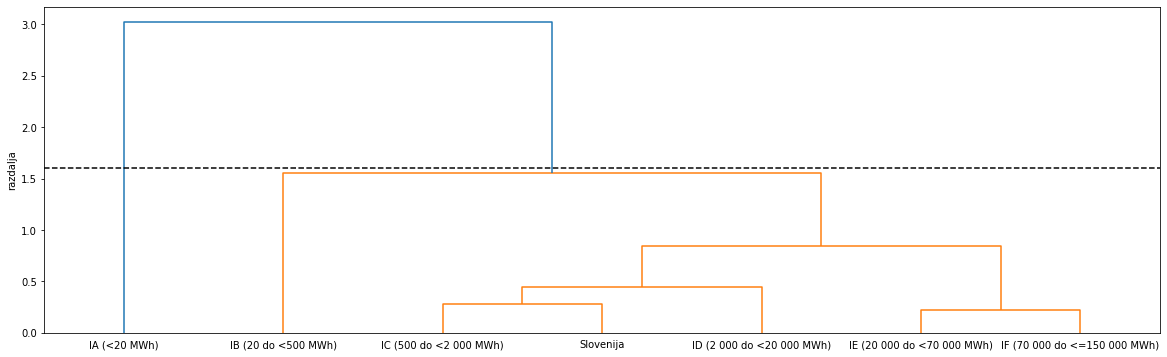

In [133]:
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score

# Create dict of values where key is the user group and value is 
vals = dict()

# Prepare dict of non household prices (with all taxes).
# Key: user group, value: numpy array of prices for each quarter. 
for sps, value in nhp.items():
    if sps not in vals:
        vals[sps] = np.asarray([x for x in value.values()])

# Convert dict to list.
data = list(vals.values())

# Calculate clusters.
L = sch.linkage(data, method='average', metric='cityblock', optimal_ordering=True)
# T - used to cut the dendrogram. It was chosen based on our personal opinion.
# We also figured out it returns the best possible silhouette score.
t = 1.6

# Get cluster predictions and calculate silhouette score.
predictions = sch.fcluster(L, t=t, criterion='distance').ravel()
print("Silhouette score: ", silhouette_score(data, predictions, metric='cityblock'))

# Display dendrogram of hierarchical clustering and cut it at t.
plt.figure(figsize=(20, 6))
labels = [movieId for movieId in vals.keys()]
D = sch.dendrogram(L, labels=labels, leaf_font_size=15, color_threshold=t)
plt.plot([0, 1000], [t, t], "k--")
plt.ylabel('razdalja')
plt.xticks(fontsize=10)
plt.show()      


Pri tem podvprašanju smo analizirali razlike med cenami (vsi davki vključeni) električne energije vseh skupnih porablniških skupin. Ker smo opazili, da se cene porabniške skupine IA močno razlikujejo od ostalih (opazili smo 2 gruči), smo izračunali razlike (procentualne in dejanske), nato pa smo se odločili, da bomo na vprašanje odgovorili z gručanjem. Z hierarhičnim gručanjem smo pokazali, da se standardne porabniške skupine delijo v 2 gruči, in sicer skupina IA, ter vse ostale. Rezultat je potrdil tudi koeficient silhuete, ki je znašal okoli 0.55, kar nakazuje na vredu gručanost.

##### 1.3.2 Analiza porastka cen električne energije skupine IB leta 2013.

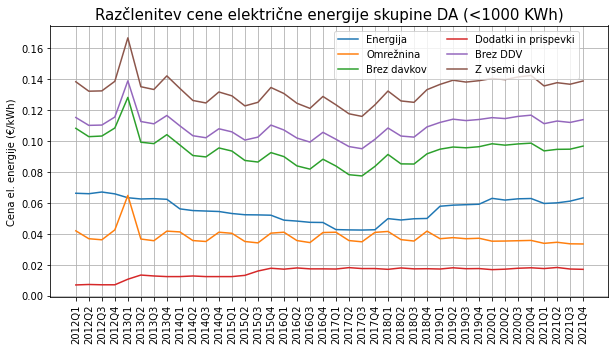

In [137]:
nhp = dict()

nhp = mu.init_dict_based_on_column(nonhousehold_prices, 'CENA')

# Fill dicts with prices for each user group and quarter, thus symulating a matrix.
# Prices include all taxes.
for column in nonhousehold_prices.columns[2:]:
    for key, value in nhp.items():
        nhp[key][column] = nonhousehold_prices[column][nonhousehold_prices['CENA'] == key][nonhousehold_prices['STANDARDNA PORABNIŠKA SKUPINA (LETNA PORABA)'] == 'IB (20 do <500 MWh)'].tolist()[0]

# Flatten the internal dicts for use in plotting.        
nhits = mu.flatten_internal_dict(nhp)
    
plt.figure(figsize=(10, 5))
plt.title('Razčlenitev cene električne energije skupine DA (<1000 KWh)', fontsize=15)
plt.xticks(rotation=90)
plt.ylabel("Cena el. energije (€/kWh)")
plt.grid()
for key, value in nhits.items():
    plt.plot(quarters, value, label=key)
plt.legend(loc='upper left', bbox_to_anchor=(0.5, 1.00), ncol=2)
print()

Opazimo lahko, da je leta 2013 močno narasla cena omrežnine, rahlo pa so se dvignili tudi dodatki in prispevki. Ta dva faktorja sta vplivala na višino cene brez davkov in z davki, kar potrjujejo tudi na [Ministrstvu za infrastukturo - Portal energetika](https://www.energetika-portal.si/nc/novica/n/v-zadnjem-cetrtletju-2013-znizanje-cen-elektricne-energije-za-gospodinjstva-in-industrijo-2620/). Torej razlog za višanje cen so povišane cene omrežnine in prispevkov za zagotavljanje podpor proizvodnji električne energije.

##### 1.3.3 Ugotovitve

#### 1.4 Analiza davkov gospodinjskih in negospodinjskih odjemalcev

#### 1.5 Povzetek in ugotovitve 